**Regression Diagnostics**

In [5]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
import math
import time

%matplotlib inline 
plt.rcParams['figure.figsize'] = (16, 12)

mypath =  r'G:\My Drive\Dropbox\IIM-Aditya\Teaching\Executive courses\MSDSM -Business Analytics\codes\Regression\\'

crime = pd.read_csv(mypath + r'crime.csv')

In [6]:
crime.rename(columns={'VI': 'crime', 'VI2': 'crime-rate', 'MU': 'murder', 'ME': 'pctmetro', 'MH': 'murder','WH':'pctwhite','HS':'highschool','PO':'poverty'}, inplace=True)

In [3]:
crime.describe()


,crime,crime-rate,murder,pctmetro,pctwhite,highschool,poverty
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,425.960784,42.588235,5.568627,72.249020,81.635294,86.462745,9.505882
std,242.595463,24.248857,6.050636,15.275894,13.806011,3.616128,3.129563
min,78.000000,8.000000,1.000000,38.200000,26.500000,78.300000,5.100000
25%,271.000000,27.000000,3.000000,60.800000,76.100000,84.000000,7.300000
50%,366.000000,37.000000,5.000000,71.600000,85.200000,87.200000,8.500000
75%,533.000000,53.000000,6.000000,86.800000,90.350000,88.800000,10.750000
max,1608.000000,161.000000,44.000000,100.000000,97.000000,92.300000,18.500000


In [4]:
crime.head()

,STATE,crime,crime-rate,murder,pctmetro,pctwhite,highschool,poverty
0,AK,593,59,6,65.6,70.8,90.2,8.0
1,AL,430,43,7,55.4,71.4,82.4,13.7
2,AR,456,46,6,52.5,81.3,79.2,12.1
3,AZ,513,51,8,88.2,87.6,84.4,11.9
4,CA,579,58,7,94.4,77.2,81.3,10.5


In [4]:
sns.pairplot(crime[['crime', 'pctmetro', 'poverty',  'highschool']].dropna(how = 'any', axis = 0))

KeyError: "None of [Index(['crime', 'pctmetro', 'poverty', 'highschool'], dtype='object')] are in the [columns]"

Text(0, 0.5, 'crime')

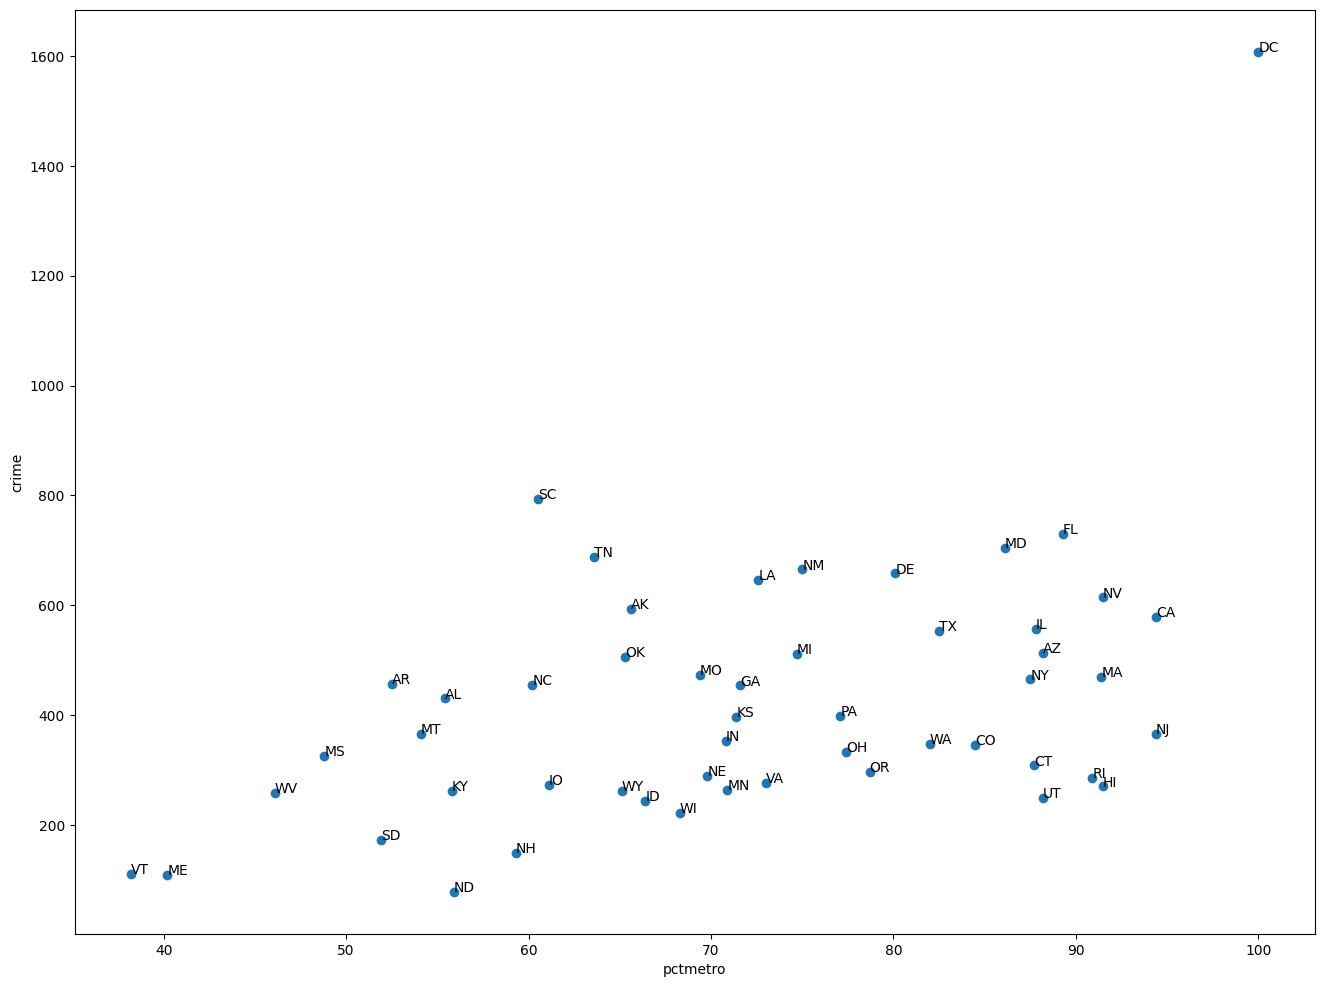

In [7]:
plt.scatter(crime.pctmetro, crime.crime)

for i, state in enumerate(crime.STATE):
    plt.annotate(state, [crime.pctmetro[i], crime.crime[i]])

plt.xlabel("pctmetro")
plt.ylabel("crime")

In [8]:
crime.head()

,STATE,crime,crime-rate,murder,pctmetro,pctwhite,highschool,poverty
0,AK,593,59,6,65.6,70.8,90.2,8.0
1,AL,430,43,7,55.4,71.4,82.4,13.7
2,AR,456,46,6,52.5,81.3,79.2,12.1
3,AZ,513,51,8,88.2,87.6,84.4,11.9
4,CA,579,58,7,94.4,77.2,81.3,10.5


In [8]:

lm = smf.ols(formula = "crime ~ pctmetro + poverty + highschool", data = crime).fit()
print (lm.summary())


influence = lm.get_influence()
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     16.57
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.76e-07
Time:                        19:58:34   Log-Likelihood:                -333.52
No. Observations:                  51   AIC:                             675.0
Df Residuals:                      47   BIC:                             682.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1319.6577    926.275     -1.425      0.1



Leverage v.s. Studentized Residuals


<Axes: >

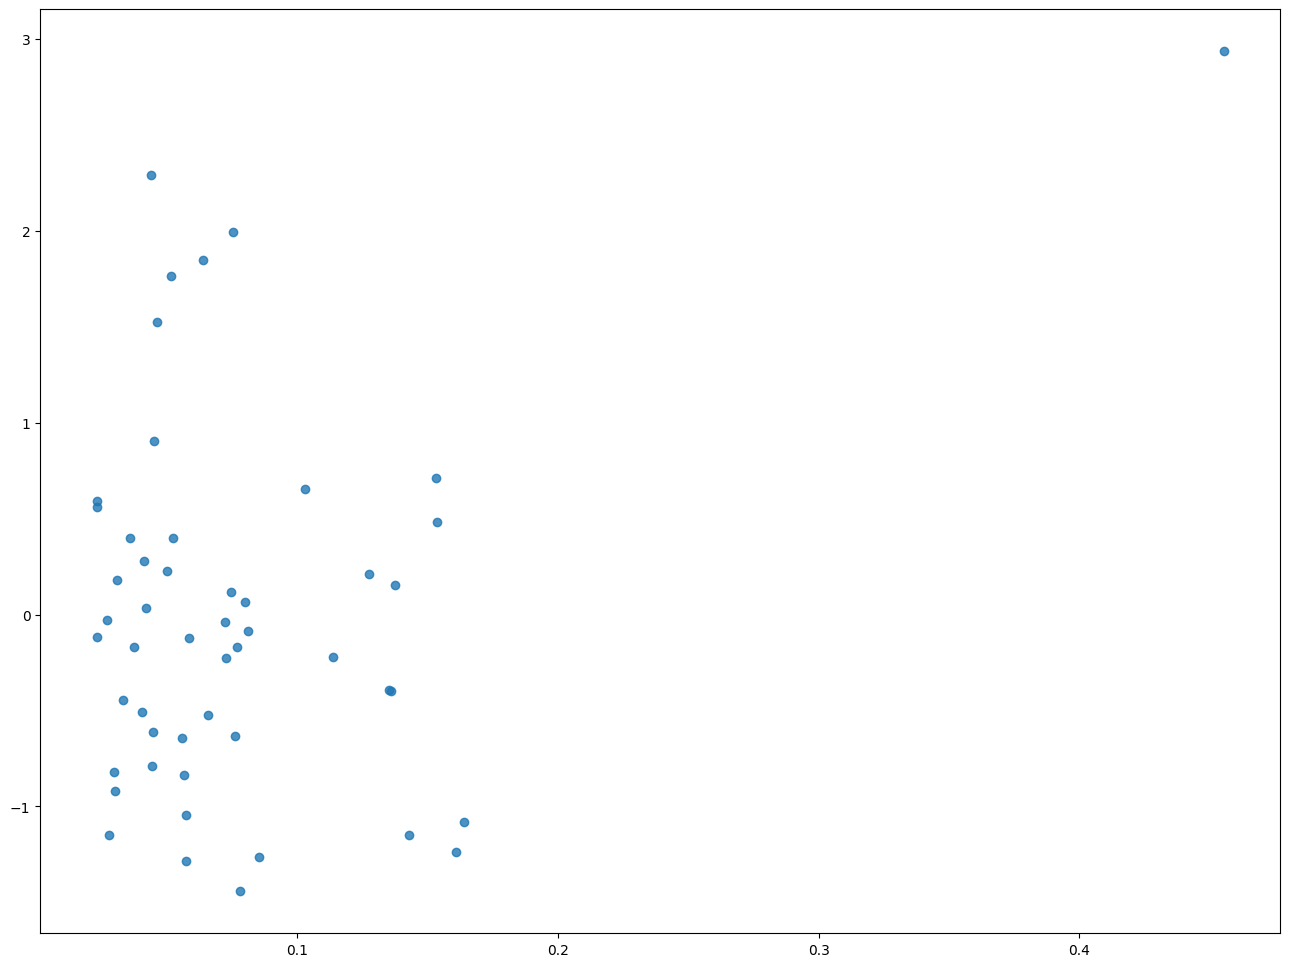

In [9]:



print ('\n')
print ('Leverage v.s. Studentized Residuals')
sns.regplot(x=leverage, y=lm.resid_pearson,  fit_reg=False)


In [10]:
crime1res = pd.concat([pd.Series(cooks, name = "cooks"), pd.Series(dffits, name = "dffits"), pd.Series(leverage, name = "leverage"), pd.Series(resid_student, name = "resid_student")], axis = 1)
crime1res = pd.concat([crime, crime1res], axis = 1)
crime1res.head()


,STATE,crime,crime-rate,murder,pctmetro,pctwhite,highschool,poverty,cooks,dffits,leverage,resid_student
0,AK,593,59,6,65.6,70.8,90.2,8.0,0.029709,0.350272,0.046348,1.588854
1,AL,430,43,7,55.4,71.4,82.4,13.7,0.000651,-0.050507,0.076943,-0.174938
2,AR,456,46,6,52.5,81.3,79.2,12.1,0.026984,0.327101,0.153270,0.768822
3,AZ,513,51,8,88.2,87.6,84.4,11.9,0.011200,-0.211072,0.056847,-0.859742
4,CA,579,58,7,94.4,77.2,81.3,10.5,0.001764,-0.083155,0.113979,-0.231846


In [11]:
r = crime1res.resid_student
print ('-'*30 + ' studentized residual ' + '-'*30)
print( r.describe())
print ('\n')

r_sort = crime1res.sort_values(by = 'resid_student')
print ('-'*30 + ' top 5 most negative residuals ' + '-'*30)
print( r_sort.head())
print ('\n')

print ('-'*30 + ' top 5 most positive residuals ' + '-'*30)
print (r_sort.tail())

------------------------------ studentized residual ------------------------------
count    51.000000
mean      0.037471
std       1.149959
min      -1.523322
25%      -0.656215
50%      -0.114635
75%       0.404943
max       4.835053
Name: resid_student, dtype: float64


------------------------------ top 5 most negative residuals ------------------------------
   STATE  crime  crime-rate  murder  pctmetro  pctwhite  highschool  poverty  \
43    UT    249          25       3      88.2      93.8        91.0      7.6   
24    MS    326          33       9      48.8      61.3        83.0     16.4   
10    HI    270          27       2      91.5      26.5        88.0      7.4   
16    KY    262          26       5      55.8      90.4        81.8     14.2   
48    WV    258          26       4      46.1      95.2        80.9     15.5   

       cooks    dffits  leverage  resid_student  
43  0.047953 -0.444073  0.078325      -1.523322  
24  0.087403 -0.596650  0.160825      -1.362916  
10  

In [12]:
print( crime[abs(r) > 2])

   STATE  crime  crime-rate  murder  pctmetro  pctwhite  highschool  poverty
7     DE    658          66       3      80.1      75.3        86.5      5.8
39    SC    794          79       7      60.5      68.3        83.6     11.3
50    DC   1608         161      44     100.0      37.4        86.4     18.5


In [13]:
leverage = crime1res.leverage
print ('-'*30 + ' Leverage ' + '-'*30)
print (leverage.describe())
print ('\n')

leverage_sort = crime1res.sort_values(by = 'leverage', ascending = False)

print ('-'*30 + ' top 5 highest leverage data points ' + '-'*30)
print (leverage_sort.head())

------------------------------ Leverage ------------------------------
count    51.000000
mean      0.078431
std       0.067450
min       0.023171
25%       0.041848
50%       0.057410
75%       0.083414
max       0.455359
Name: leverage, dtype: float64


------------------------------ top 5 highest leverage data points ------------------------------
   STATE  crime  crime-rate  murder  pctmetro  pctwhite  highschool  poverty  \
50    DC   1608         161      44     100.0      37.4        86.4     18.5   
38    RI    286          29       2      90.9      89.0        81.1      8.2   
24    MS    326          33       9      48.8      61.3        83.0     16.4   
45    VT    110          11       2      38.2      96.9        90.8      6.4   
2     AR    456          46       6      52.5      81.3        79.2     12.1   

       cooks    dffits  leverage  resid_student  
50  3.310269  4.421023  0.455359       4.835053  
38  0.068448 -0.525507  0.164168      -1.185752  
24  0.087403 -0.

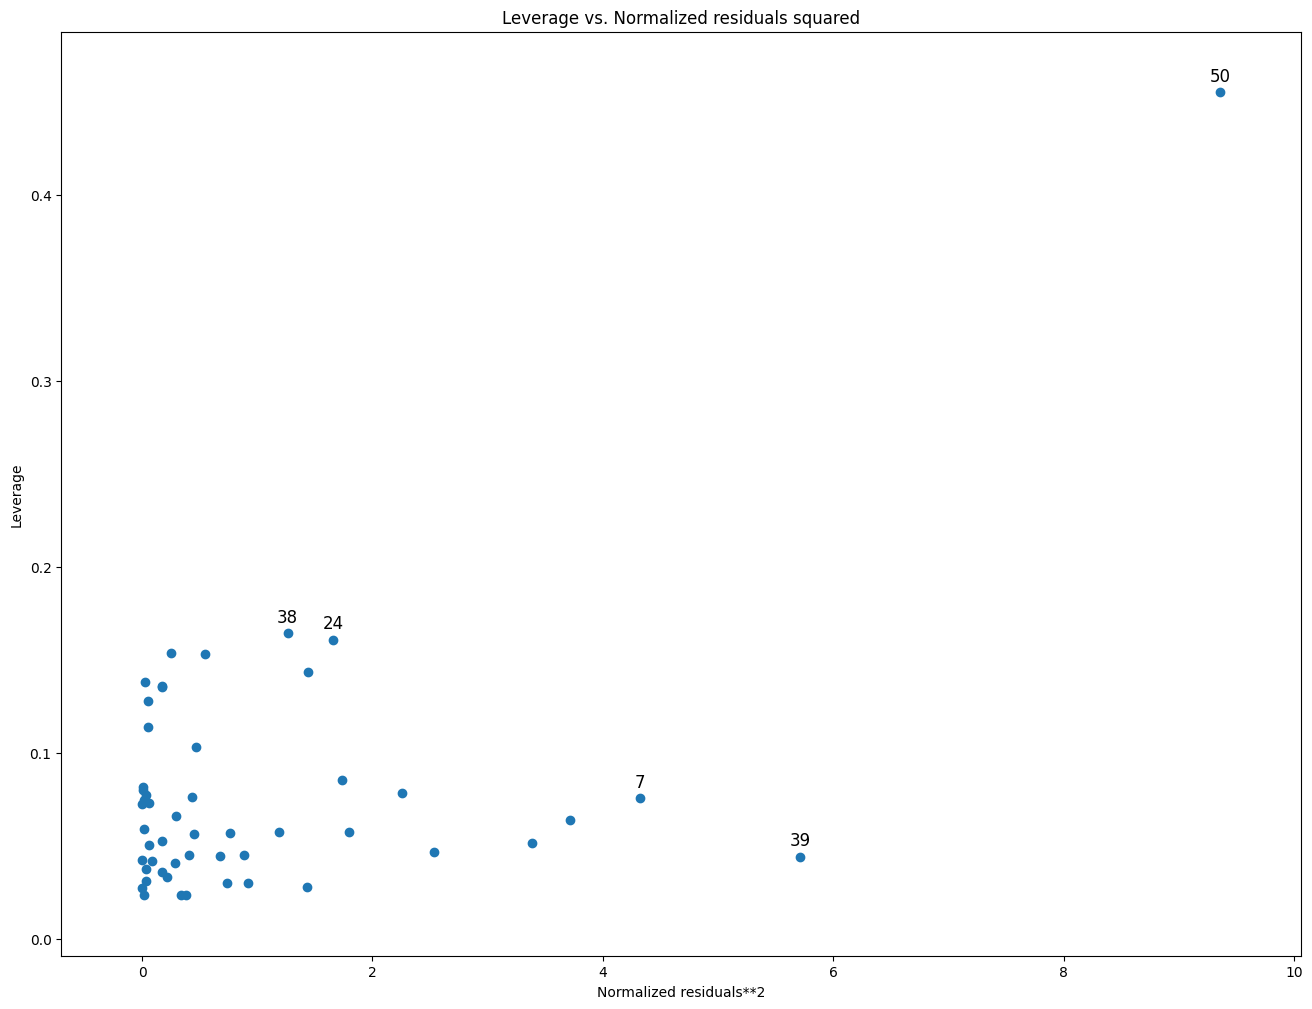

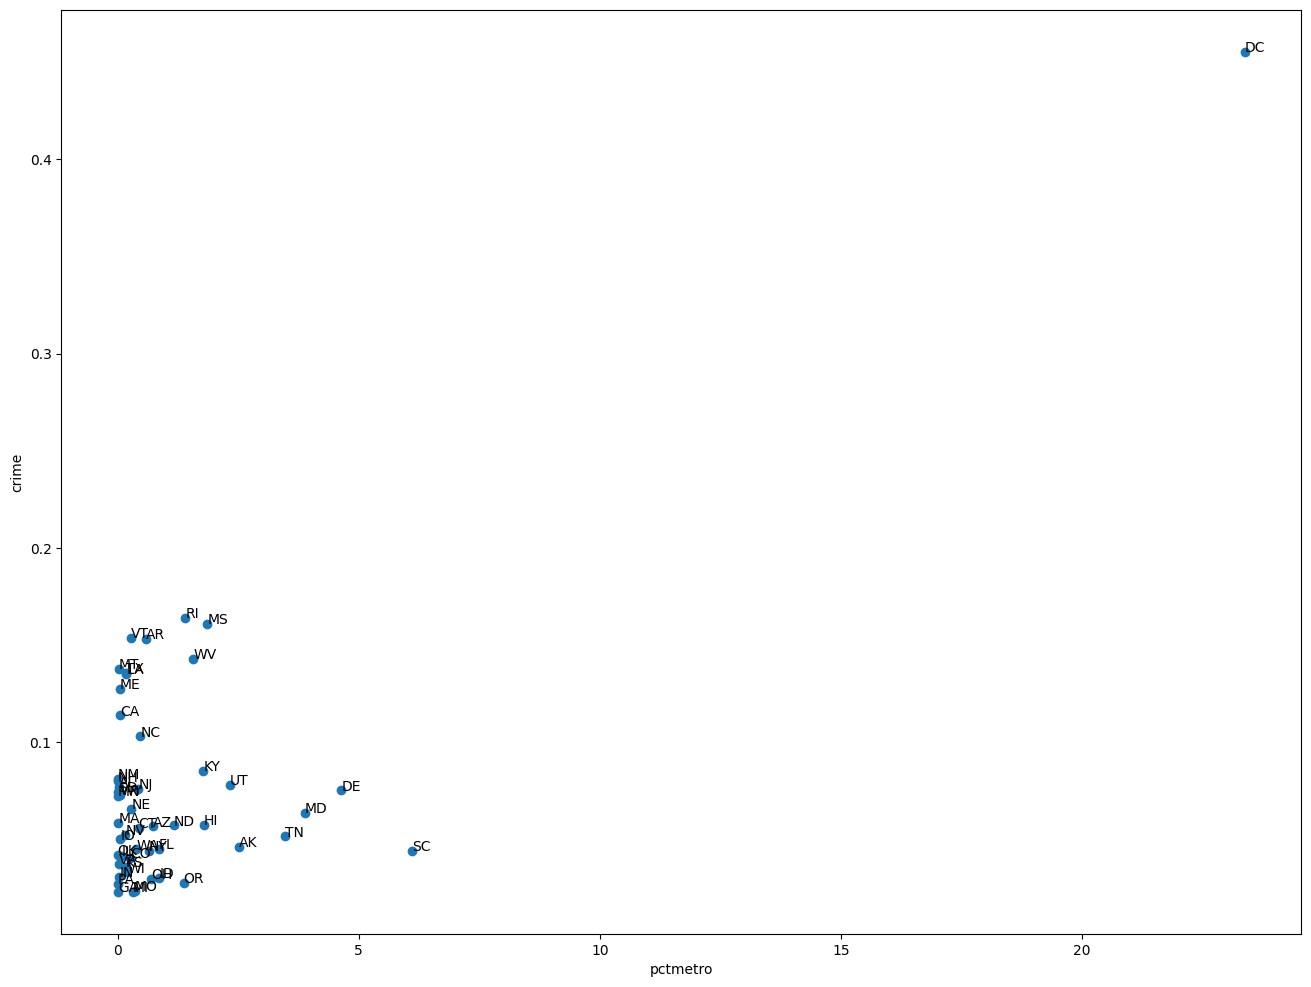

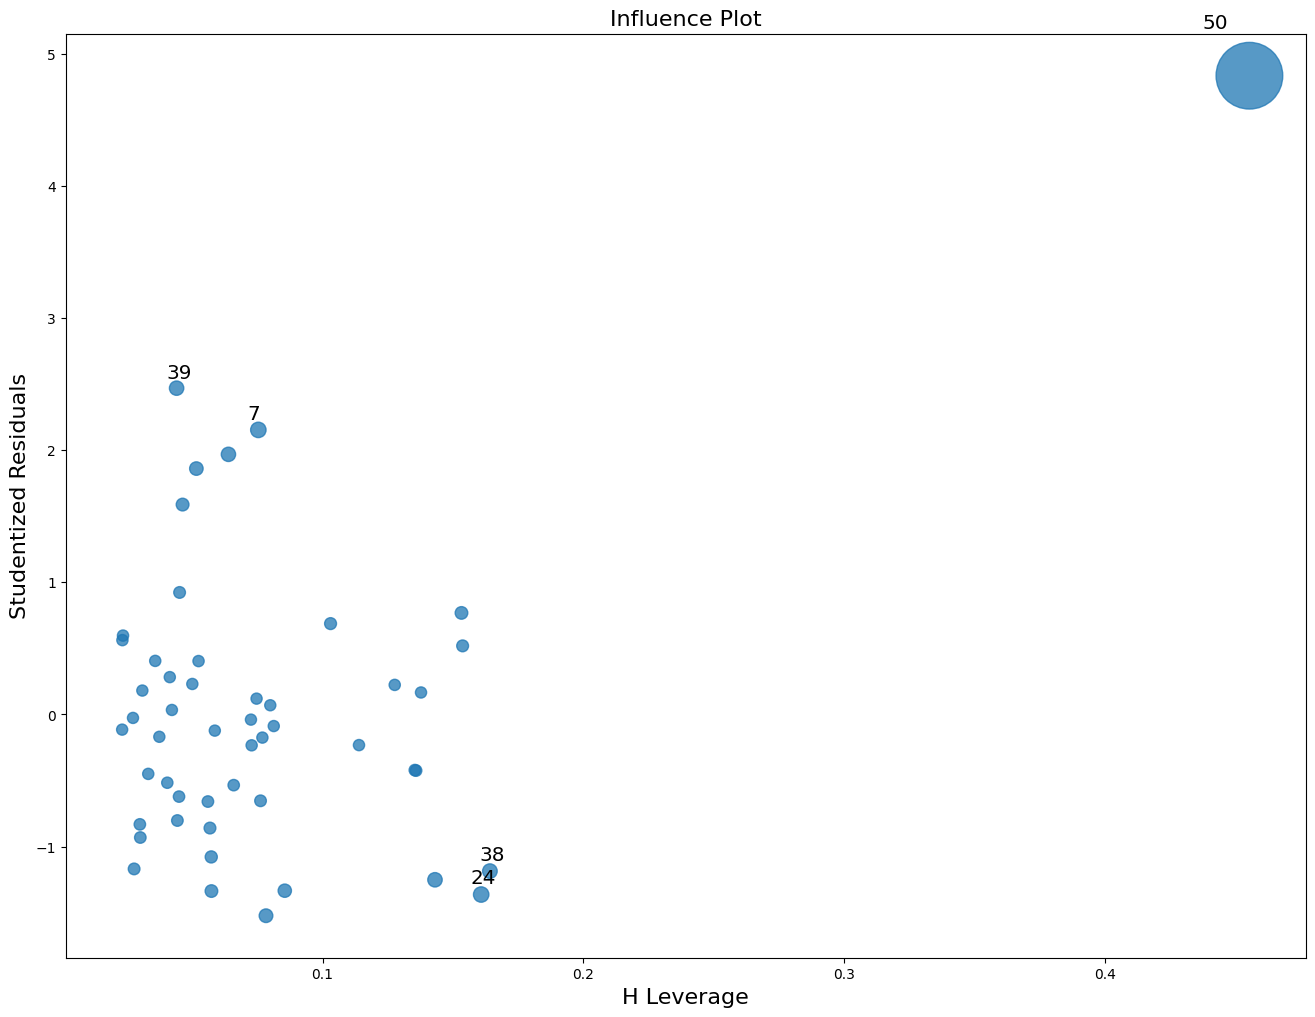

In [14]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(lm)
plt.show()

plt.scatter(crime1res.resid_student ** 2, crime1res.leverage)
for i, state in enumerate(crime.STATE):
    plt.annotate(state, [(crime1res.resid_student ** 2)[i],  crime1res.leverage[i]])
plt.xlabel("pctmetro")
plt.ylabel("crime")
plt.show()

influence_plot(lm)
plt.show()

In [15]:
crime1res[abs(crime1res.dffits) > 2 * math.sqrt(3.0 / 51)]


,STATE,crime,crime-rate,murder,pctmetro,pctwhite,highschool,poverty,cooks,dffits,leverage,resid_student
7,DE,658,66,3,80.1,75.3,86.5,5.8,0.087786,0.615094,0.075390,2.154096
19,MD,704,70,10,86.1,64.5,87.4,6.1,0.062376,0.514565,0.063925,1.969062
24,MS,326,33,9,48.8,61.3,83.0,16.4,0.087403,-0.596650,0.160825,-1.362916
38,RI,286,29,2,90.9,89.0,81.1,8.2,0.068448,-0.525507,0.164168,-1.185752
39,SC,794,79,7,60.5,68.3,83.6,11.3,0.063404,0.530228,0.044049,2.470073
48,WV,258,26,4,46.1,95.2,80.9,15.5,0.064599,-0.511376,0.143114,-1.251296
50,DC,1608,161,44,100.0,37.4,86.4,18.5,3.310269,4.421023,0.455359,4.835053


In [16]:
crimedfbeta = pd.concat([crime1res, pd.DataFrame(influence.dfbetas, columns = ['dfb_intercept', 'dfb_pctmetro', 'dfb_poverty', 'dfb_highschool'])], axis = 1)
print (crimedfbeta.head())

  STATE  crime  crime-rate  murder  pctmetro  pctwhite  highschool  poverty  \
0    AK    593          59       6      65.6      70.8        90.2      8.0   
1    AL    430          43       7      55.4      71.4        82.4     13.7   
2    AR    456          46       6      52.5      81.3        79.2     12.1   
3    AZ    513          51       8      88.2      87.6        84.4     11.9   
4    CA    579          58       7      94.4      77.2        81.3     10.5   

      cooks    dffits  leverage  resid_student  dfb_intercept  dfb_pctmetro  \
0  0.029709  0.350272  0.046348       1.588854      -0.181574     -0.090670   
1  0.000651 -0.050507  0.076943      -0.174938      -0.010342      0.025781   
2  0.026984  0.327101  0.153270       0.768822       0.262552     -0.167257   
3  0.011200 -0.211072  0.056847      -0.859742       0.030958     -0.141324   
4  0.001764 -0.083155  0.113979      -0.231846      -0.046242     -0.046422   

   dfb_poverty  dfb_highschool  
0     0.064023   

In [65]:
crime.head()

,STATE,crime,crime-rate,murder,pctmetro,pctwhite,highschool,poverty
0,AK,593,59,6,65.6,70.8,90.2,8.0
1,AL,430,43,7,55.4,71.4,82.4,13.7
2,AR,456,46,6,52.5,81.3,79.2,12.1
3,AZ,513,51,8,88.2,87.6,84.4,11.9
4,CA,579,58,7,94.4,77.2,81.3,10.5


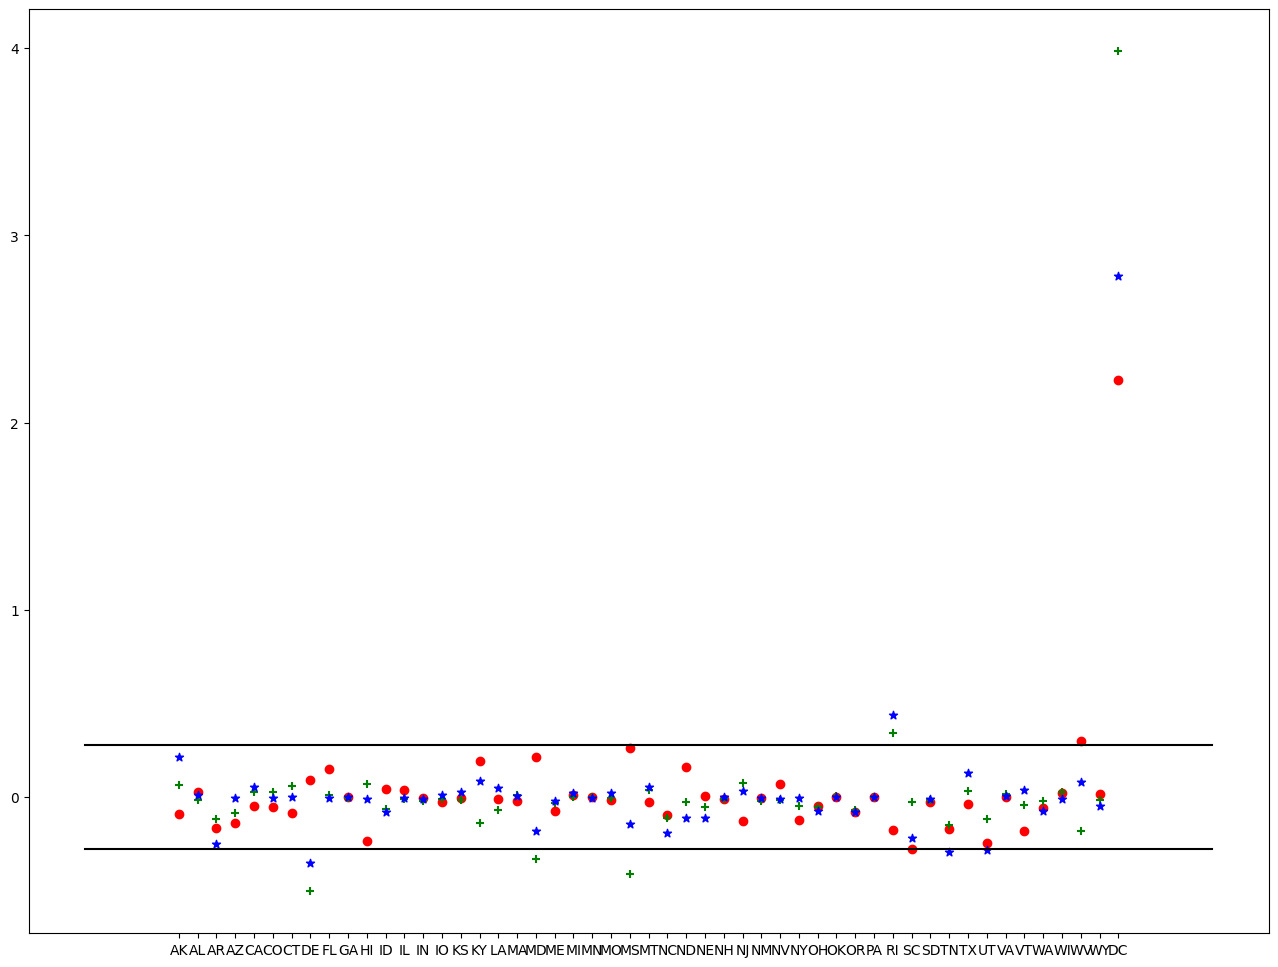

In [17]:
plt.scatter(crimedfbeta.STATE, crimedfbeta.dfb_pctmetro, color = "red", marker = "o")
plt.scatter(crimedfbeta.STATE, crimedfbeta.dfb_poverty, color = "green", marker = "+")
plt.scatter(crimedfbeta.STATE, crimedfbeta.dfb_highschool, color = "blue", marker = "*")

# add a horizontial line in pyplot, using plt.plot((x1, x2), (y1, y2), 'c-')
plt.plot((-5, 55), (0.28, 0.28), 'k-')
plt.plot((-5, 55), (-0.28, -0.28), 'k-')

In [71]:
lm_1 = smf.ols(formula = "crime ~ pctmetro + poverty + highschool", data = crime[crime.STATE != "dc"]).fit()
print (lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     16.57
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.76e-07
Time:                        22:47:44   Log-Likelihood:                -333.52
No. Observations:                  51   AIC:                             675.0
Df Residuals:                      47   BIC:                             682.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1319.6577    926.275     -1.425      0.1

**Tests for Normality of Residuals**

In [72]:
elemapi2 = pd.read_csv(mypath + 'elemapi.csv')
lm = smf.ols(formula = "api00 ~ meals + ell + emer", data = elemapi2).fit()
print (lm.summary())

elem1res = pd.concat([elemapi2, pd.Series(lm.resid, name = 'resid'), pd.Series(lm.predict(), name = "predict")], axis = 1)

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     673.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.89e-155
Time:                        22:48:54   Log-Likelihood:                -2188.5
No. Observations:                 400   AIC:                             4385.
Df Residuals:                     396   BIC:                             4401.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    886.7033      6.260    141.651      0.0

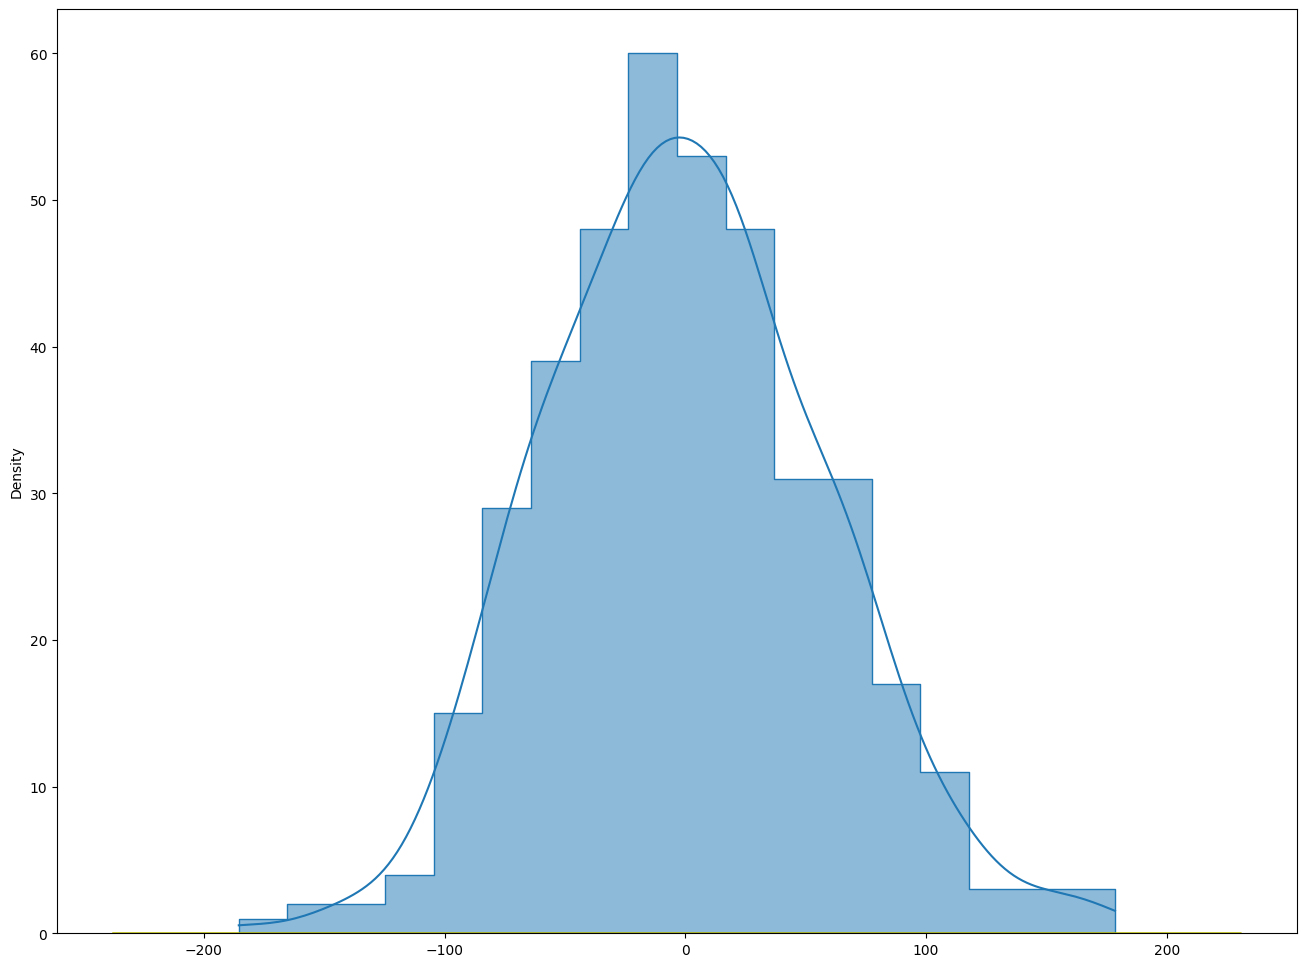

In [96]:
sns.kdeplot(np.array(elem1res.resid), color='y')
sns.histplot(np.array(elem1res.resid),kde=True, element='step')
plt.show()

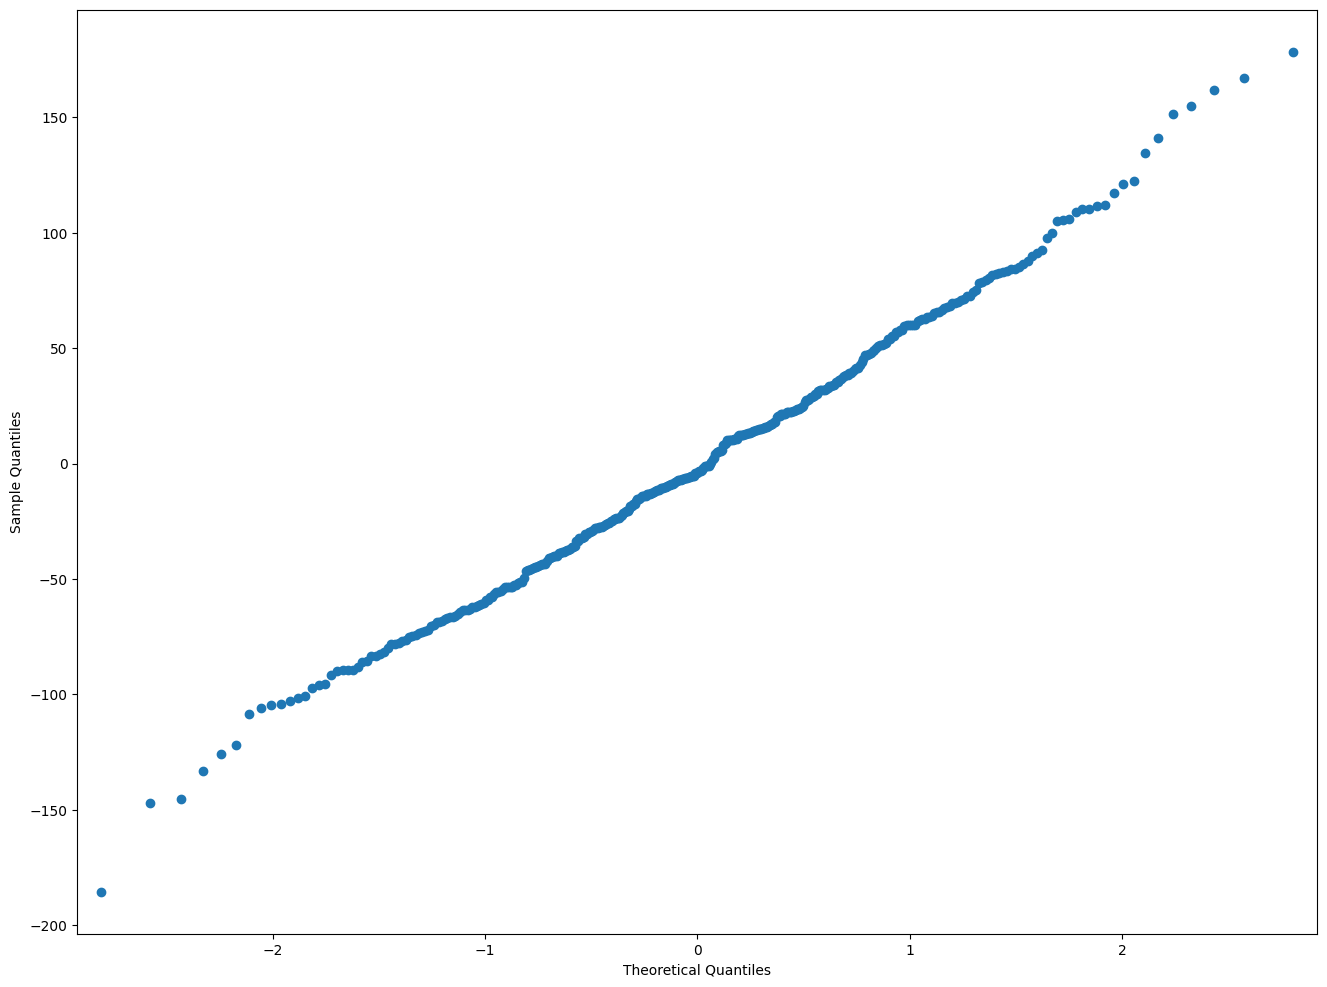

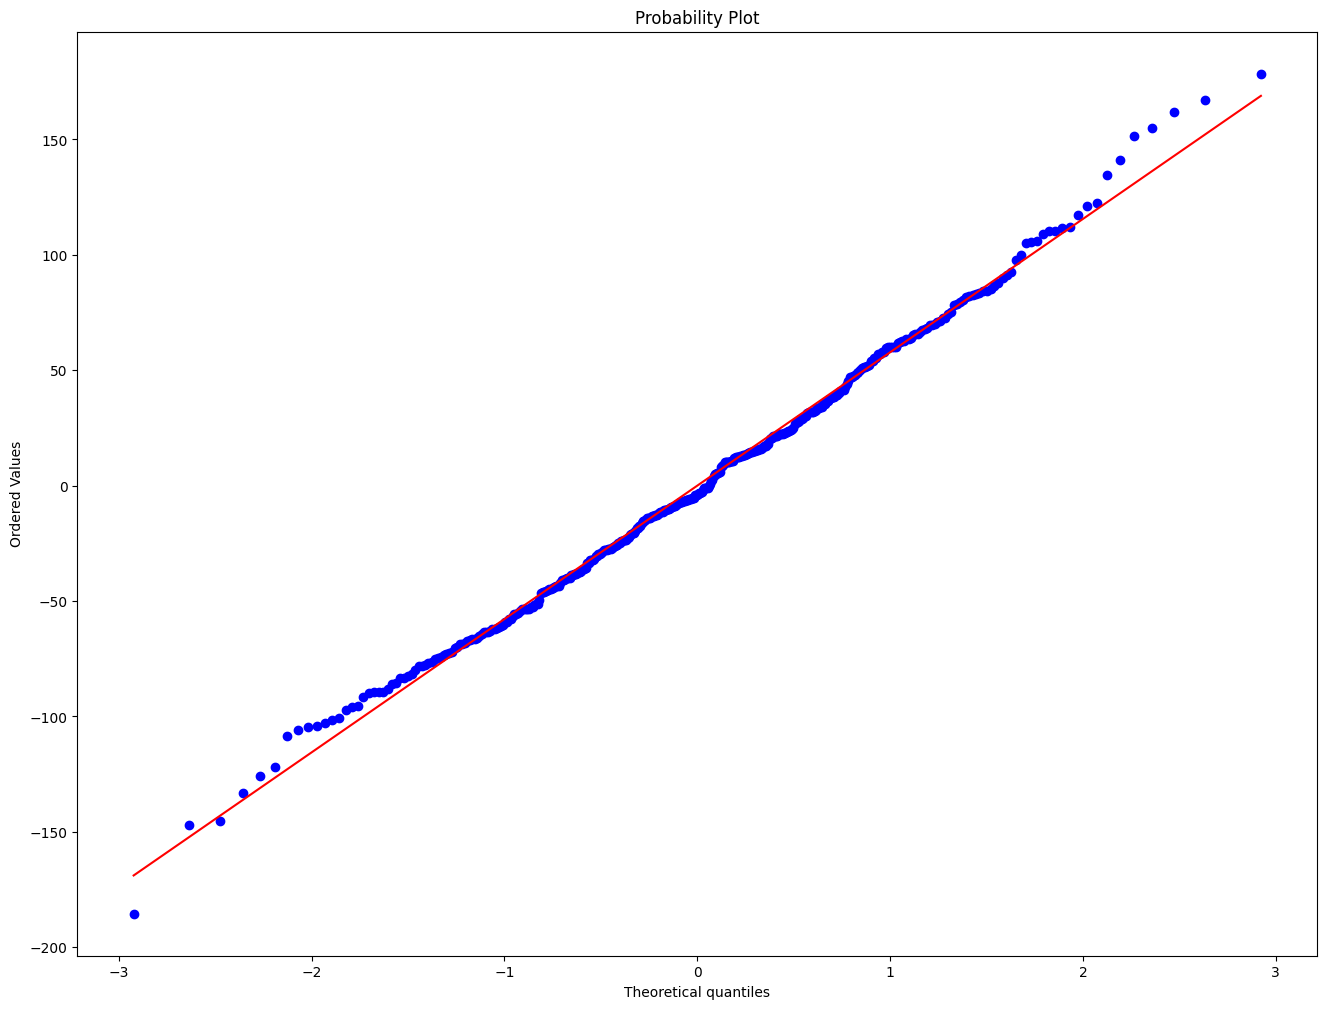

In [97]:
sm.qqplot(elem1res.resid)
plt.show()

import pylab
scipystats.probplot(elem1res.resid, dist="norm", plot=pylab)
pylab.show()

In [98]:
'''
by default, scipy stats.kstest for normal will assume mean 0 and stdev 1. To use this, the data should be normalized first
'''
resid = elem1res.resid
norm_resid = (elem1res.resid - np.mean(elem1res.resid)) / np.std(elem1res.resid)
print (scipystats.kstest(norm_resid, 'norm')
)
# or use the statsmodels provided function kstest_normal to use kolmogorov-smirnov test or Anderson-Darling test
print (stats.diagnostic.kstest_normal(elem1res.resid, pvalmethod='approx'))
print (stats.diagnostic.normal_ad(elem1res.resid))

KstestResult(statistic=0.032723261818187244, pvalue=0.7722893087866447, statistic_location=-0.09469954881304994, statistic_sign=1)
(0.032676218847941974, 0.39718054853912677)
(0.34071240334696995, 0.49471893268923145)


**Tests for Heteroscedasticity**

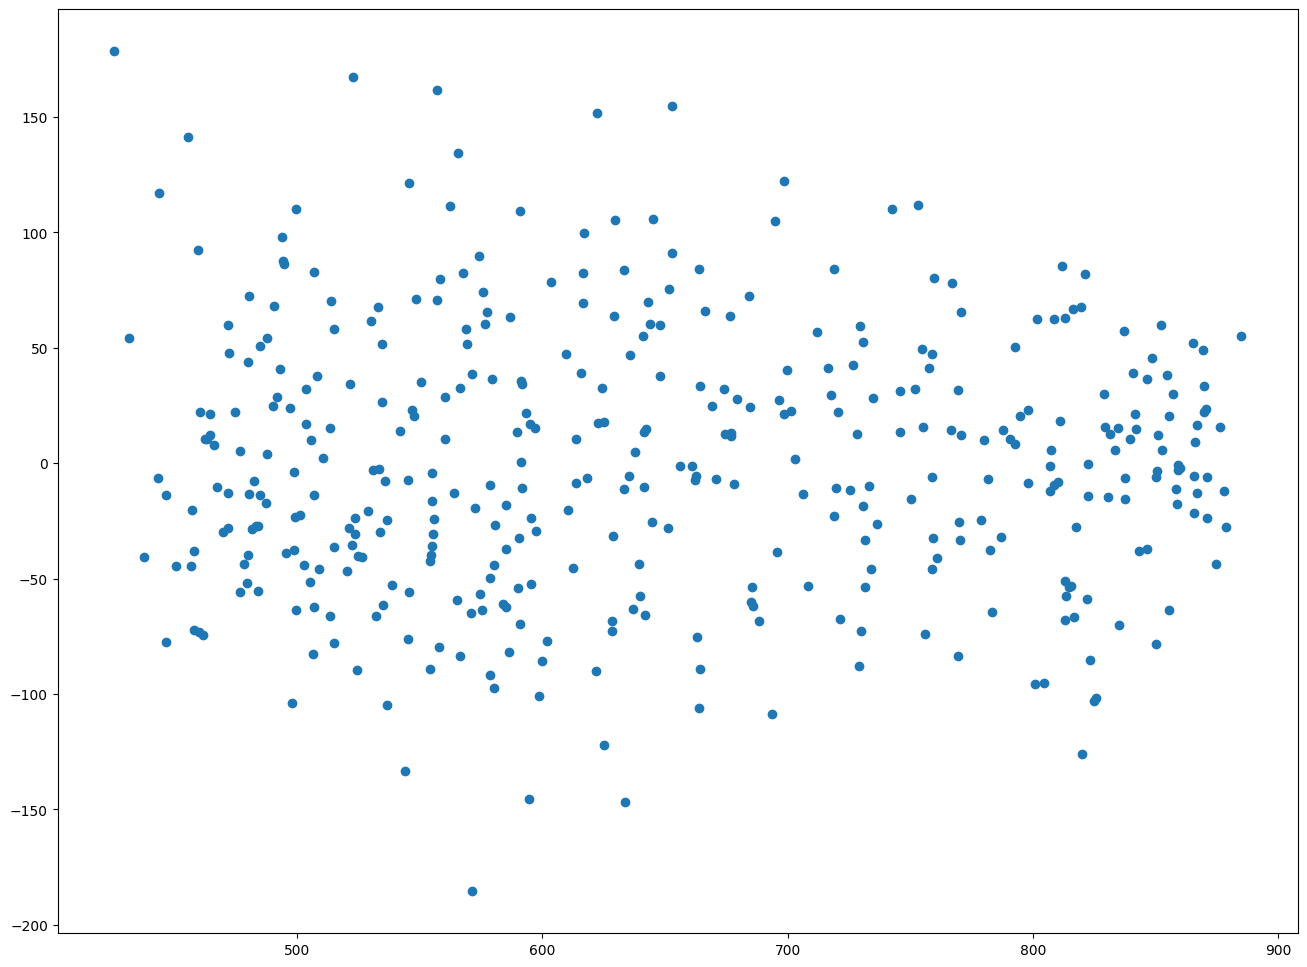

In [99]:
lm = smf.ols(formula = "api00 ~ meals + ell + emer", data = elemapi2).fit()

resid = lm.resid
plt.scatter(lm.predict(), resid)

In [101]:
# p-value here is different from SAS output, need double check
stats.diagnostic.het_white(resid, lm.model.exog)

(18.352755736667127,
 0.03129463401079875,
 2.083825034443331,
 0.02998778975335726)

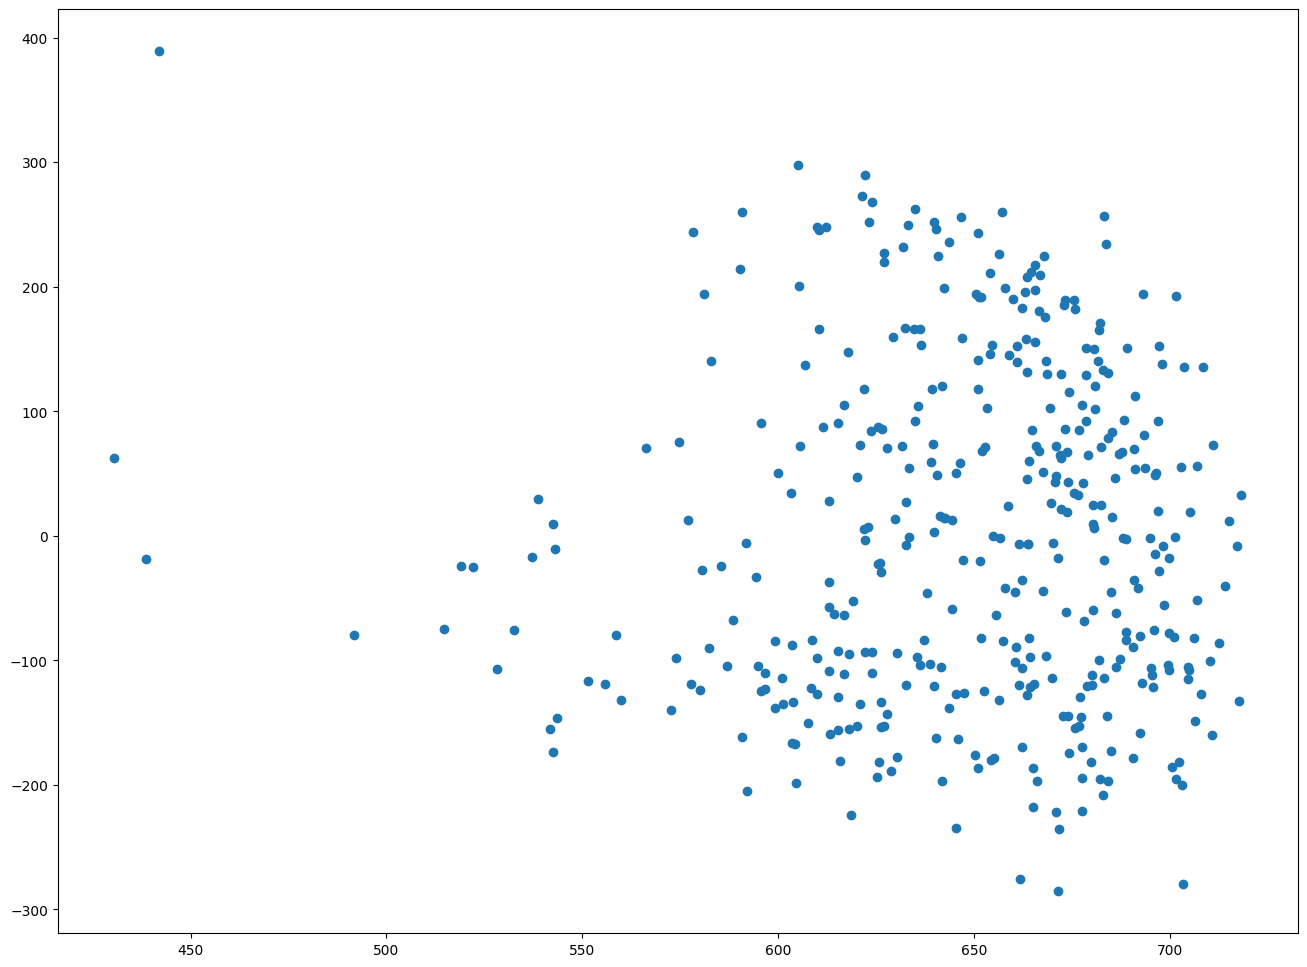

In [102]:

lm2 = smf.ols(formula = "api00 ~ enroll", data = elemapi2).fit()

plt.scatter(lm2.predict(), lm2.resid)

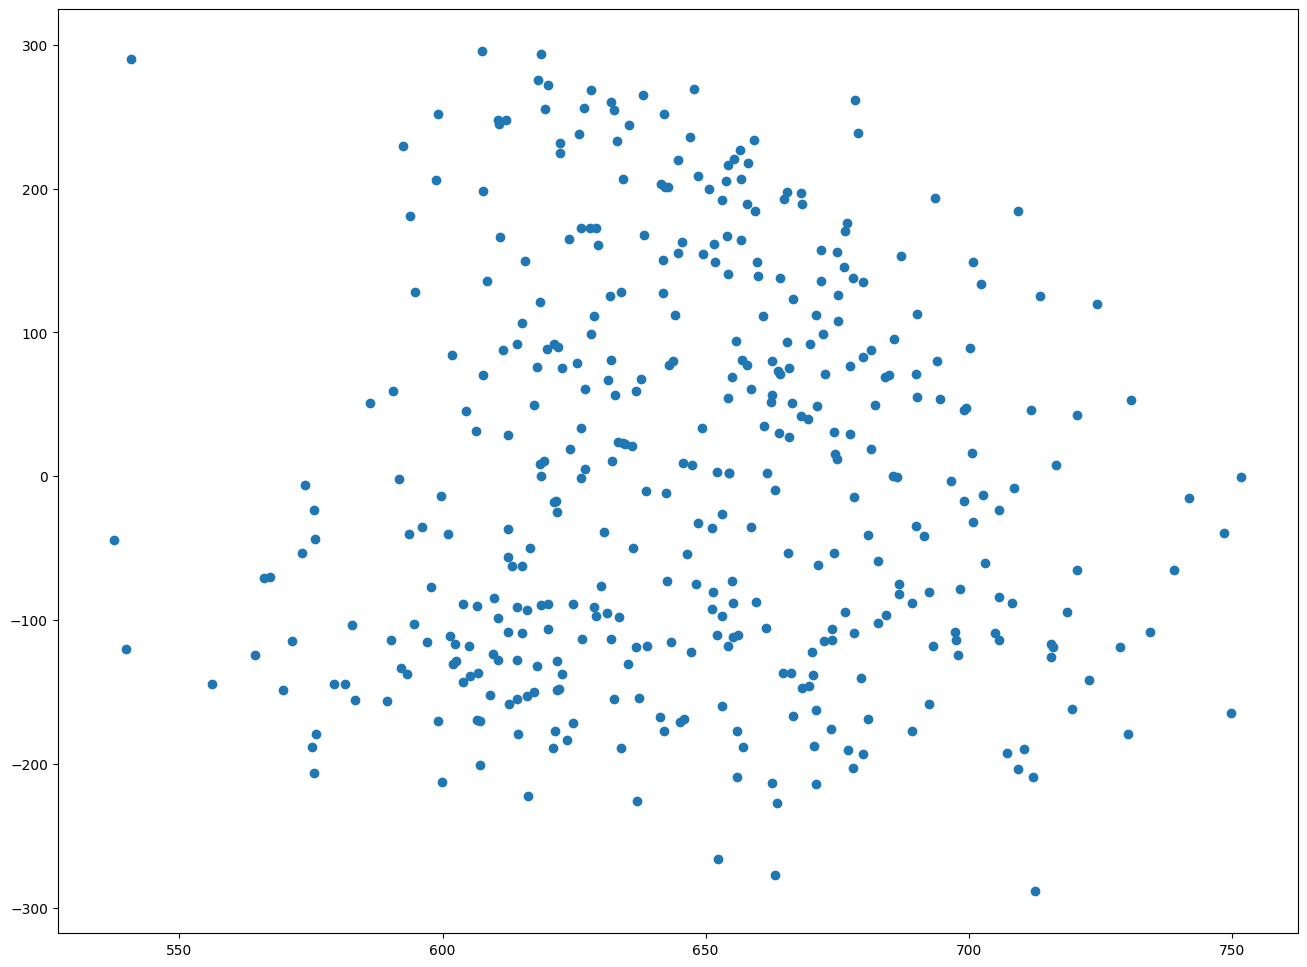

In [103]:
elemapi2['log_enroll'] = elemapi2.enroll.map(lambda x: math.log(x))
lm3 = smf.ols(formula = "api00 ~ log_enroll", data = elemapi2).fit()

plt.scatter(lm3.predict(), lm3.resid)

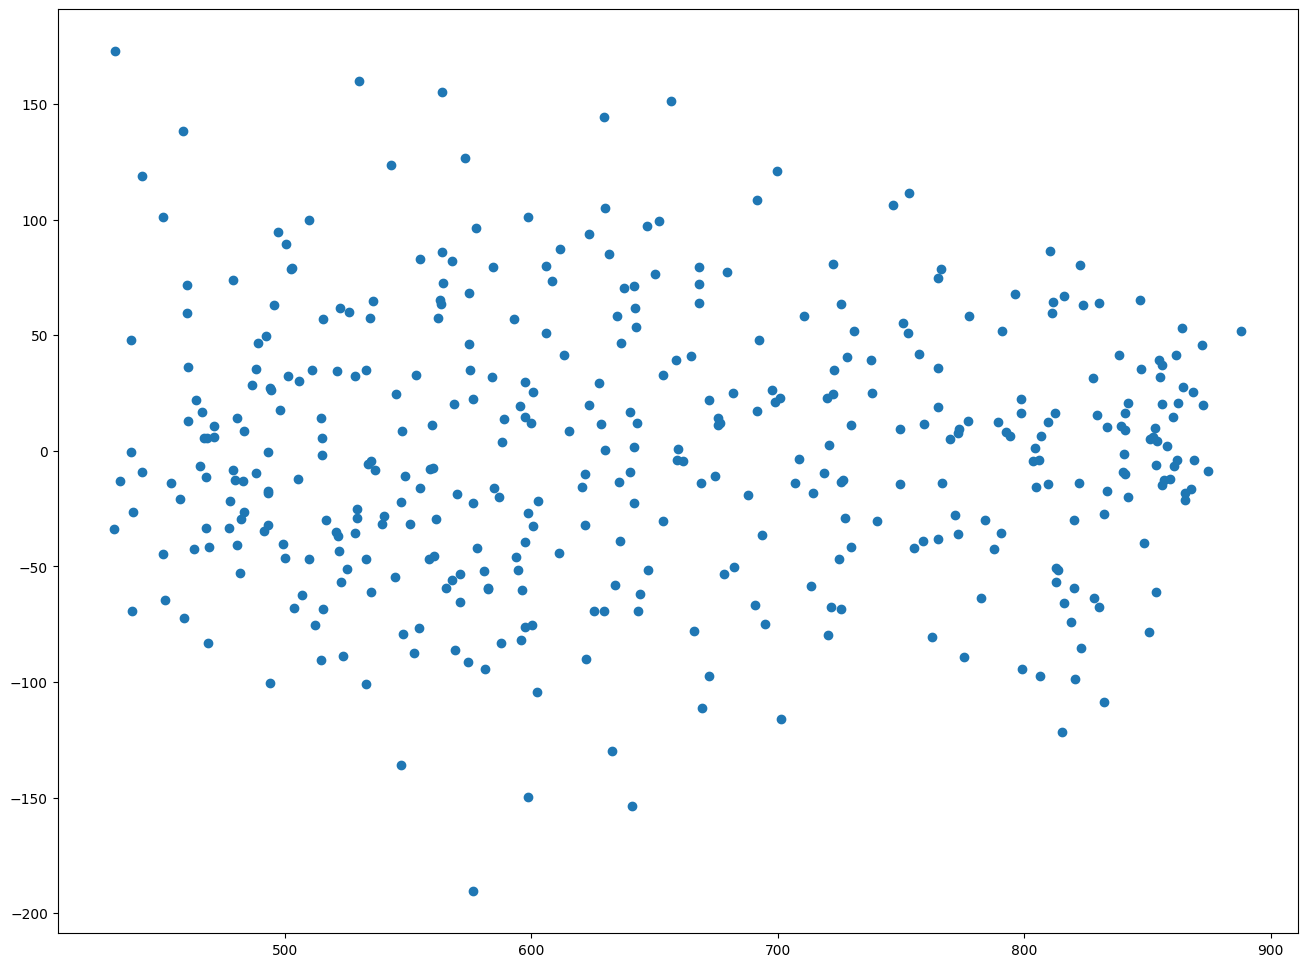

In [104]:
lm4 = smf.ols(formula = "api00 ~ meals + ell + emer + enroll", data = elemapi2).fit()

resid = lm4.resid
plt.scatter(lm4.predict(), resid)

**Tests for Collinearity**


In [106]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = smf.ols(formula = "api00 ~ meals + ell + emer", data = elemapi2).fit()
y, X = dmatrices("api00 ~ meals + ell + emer", data = elemapi2, return_type = "dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print( vif)

[4.6883371380583, 2.7250555232887423, 2.5105120172587836, 1.4148169984086654]


In [107]:
corr = np.corrcoef(X.drop("Intercept", axis = 1), rowvar = 0)
print ("correlation from np.corrcoef is " )
print (corr)

print ('\n')
print ("correlation from df.corr() is " )
print (X.drop("Intercept", axis = 1).corr())

print ('\n')

w, v = np.linalg.eig(corr)    
print ("the eigen value of the correlation coefficient is ")
print (w)

correlation from np.corrcoef is 
[[1.         0.77237718 0.53303874]
 [0.77237718 1.         0.47217948]
 [0.53303874 0.47217948 1.        ]]


correlation from df.corr() is 
          meals       ell      emer
meals  1.000000  0.772377  0.533039
ell    0.772377  1.000000  0.472179
emer   0.533039  0.472179  1.000000


the eigen value of the correlation coefficient is 
[2.19536815 0.22351013 0.58112172]


**Tests on Nonlinearity**

In [124]:
nations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   gnpcap                              226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

                            OLS Regression Results                            
Dep. Variable:                  birth   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     69.05
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           3.27e-13
Time:                        08:36:05   Log-Likelihood:                -411.80
No. Observations:                 109   AIC:                             827.6
Df Residuals:                     107   BIC:                             833.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.9242      1.261     30.856      0.0

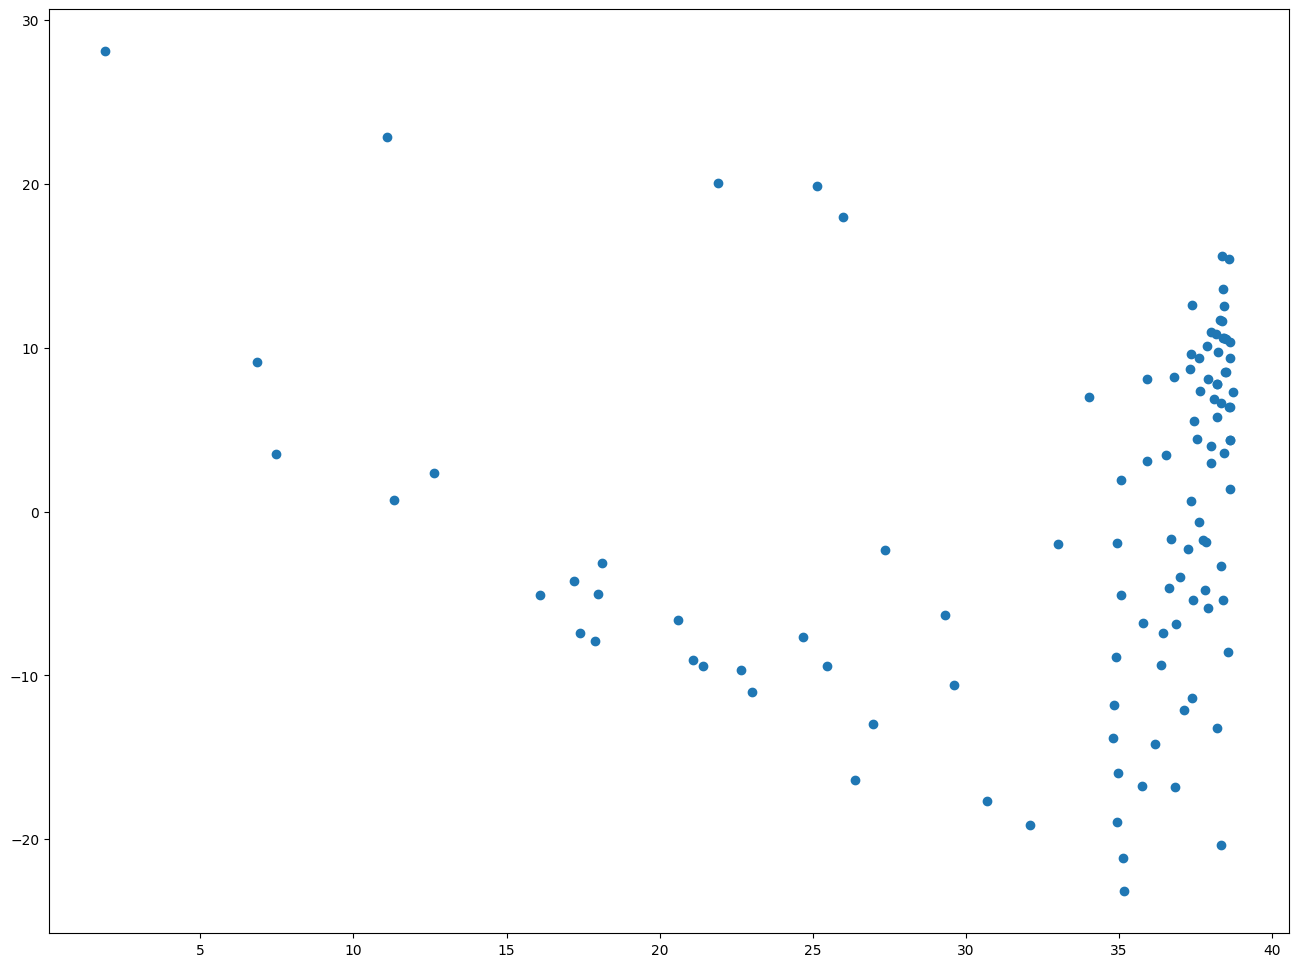

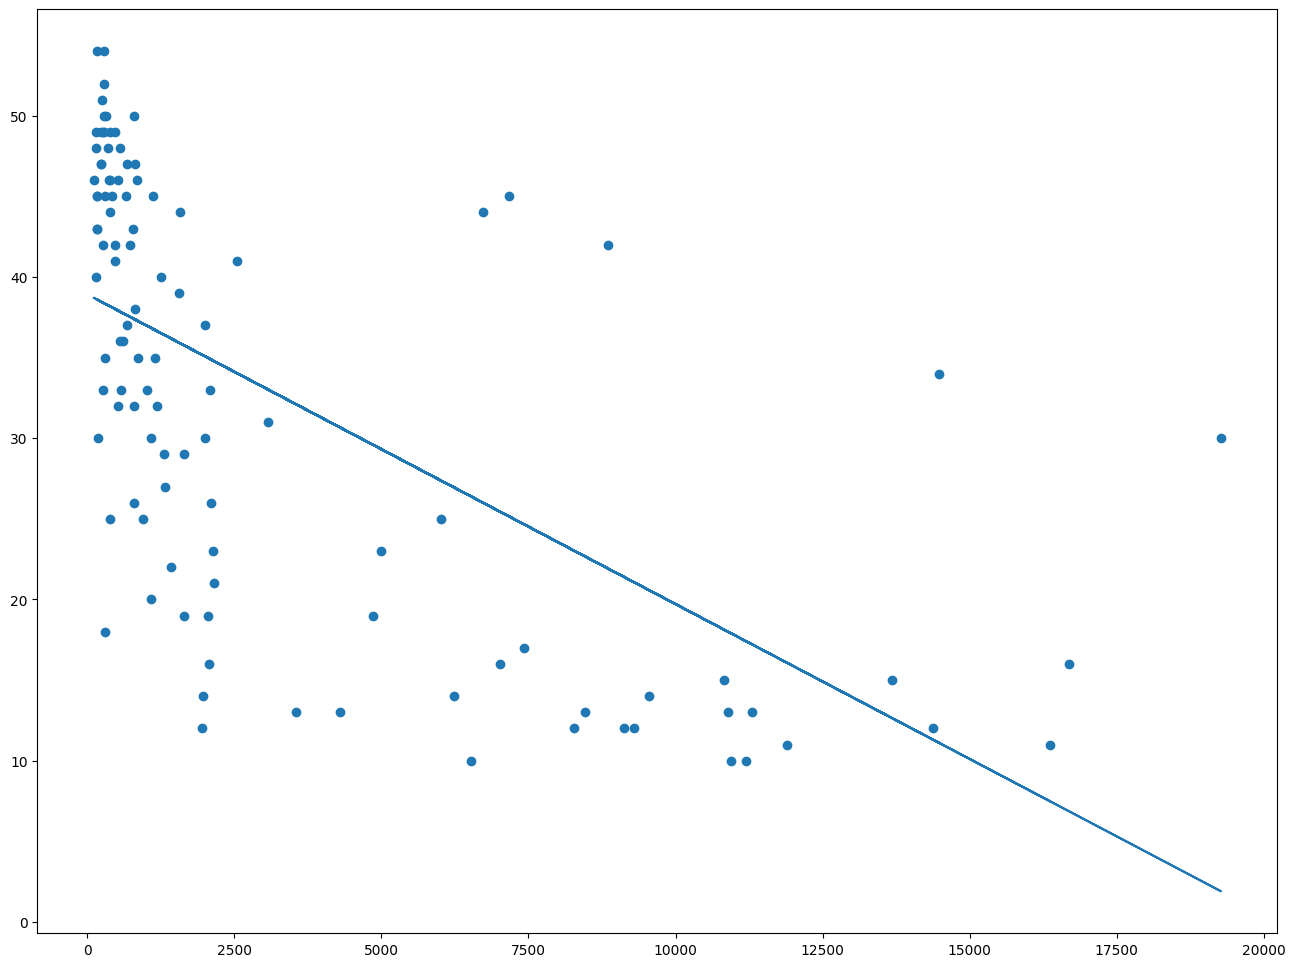

In [125]:
nations = pd.read_csv(mypath + "nations.csv")
# print nations.describe()

lm = smf.ols(formula = "birth ~ gnpcap", data = nations).fit()
print (lm.summary())

plt.scatter(lm.predict(), lm.resid)
plt.show()

plt.scatter(nations.gnpcap, nations.birth)
plt.plot(nations.gnpcap, lm.params[0] + lm.params[1] * nations.gnpcap, '-')
plt.show()

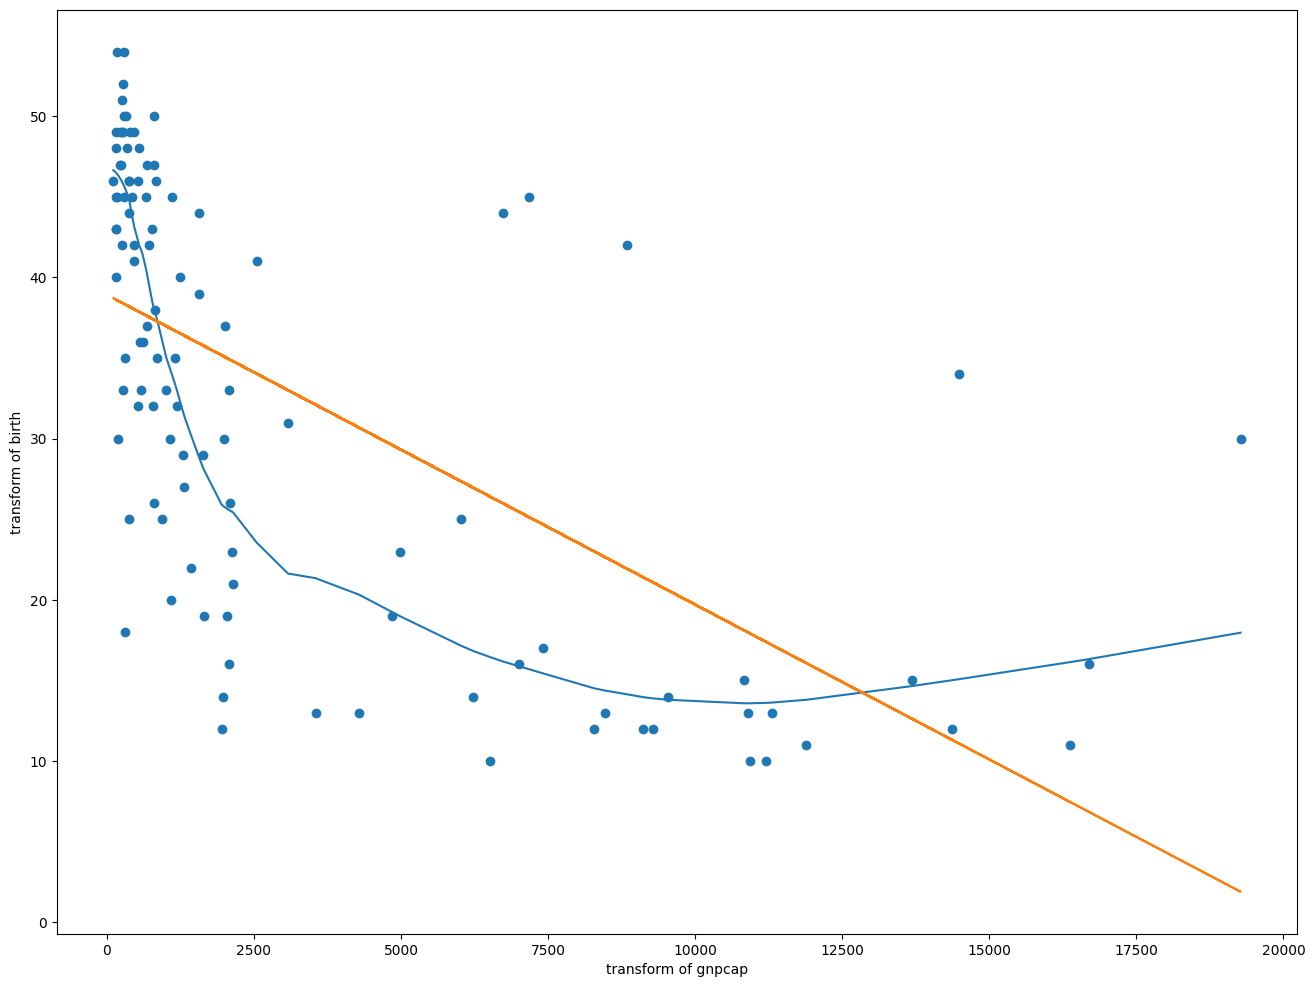

In [126]:
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_df = pd.DataFrame(lowess(endog = nations.birth, exog = nations.gnpcap, frac = 0.4), columns = ["gnpcap", "birth"])

plt.plot(lowess_df.gnpcap, lowess_df.birth)
plt.scatter(nations.gnpcap, nations.birth)
plt.plot(nations.gnpcap, lm.params[0] + lm.params[1] * nations.gnpcap, '-')
plt.xlabel("transform of gnpcap")
plt.ylabel("transform of birth")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  birth   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     142.6
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           2.12e-21
Time:                        08:38:33   Log-Likelihood:                -392.77
No. Observations:                 109   AIC:                             789.5
Df Residuals:                     107   BIC:                             794.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.2773      4.397     19.168      0.0

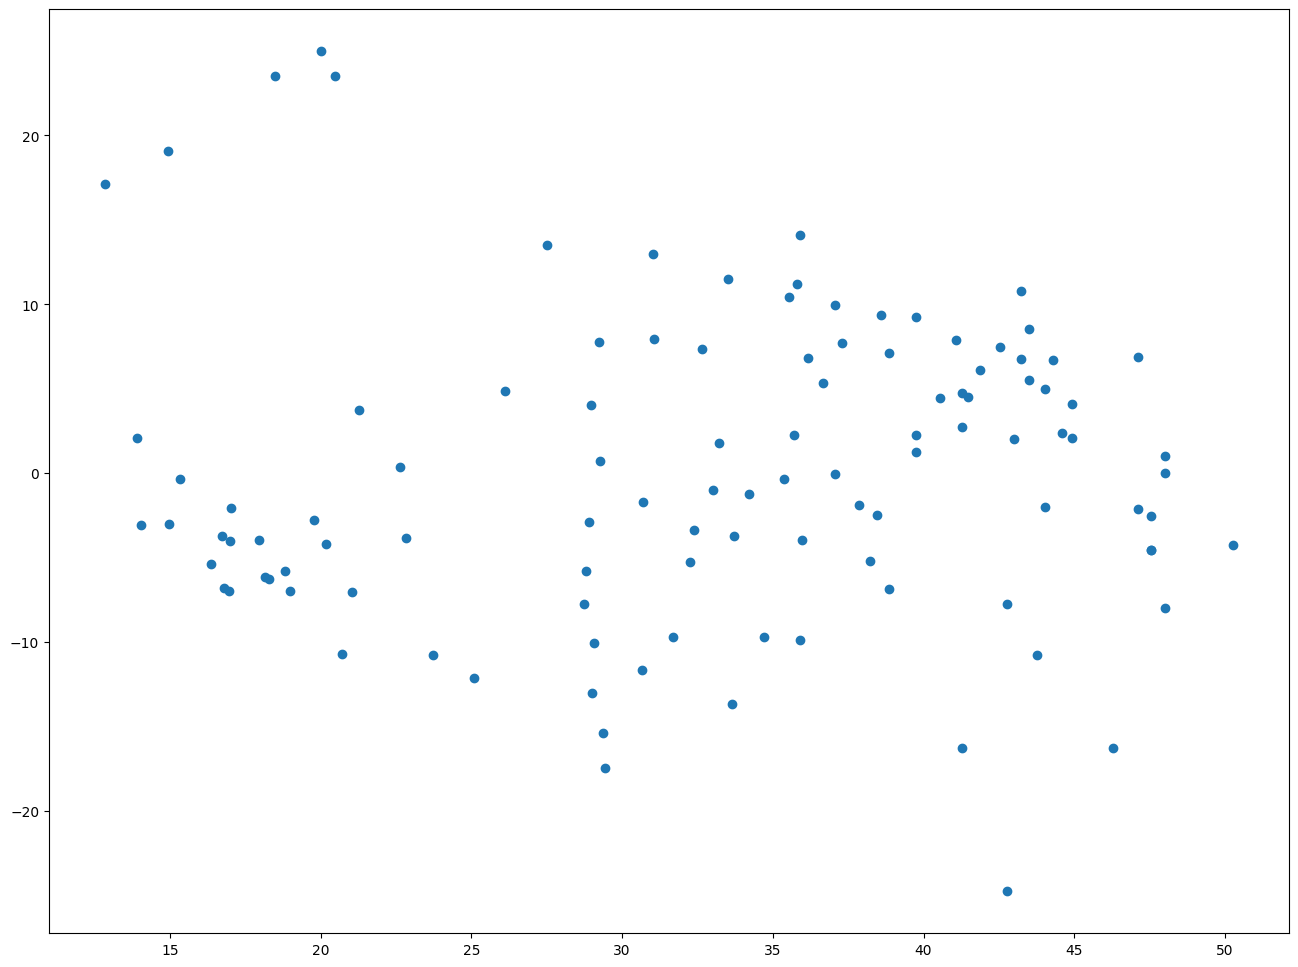

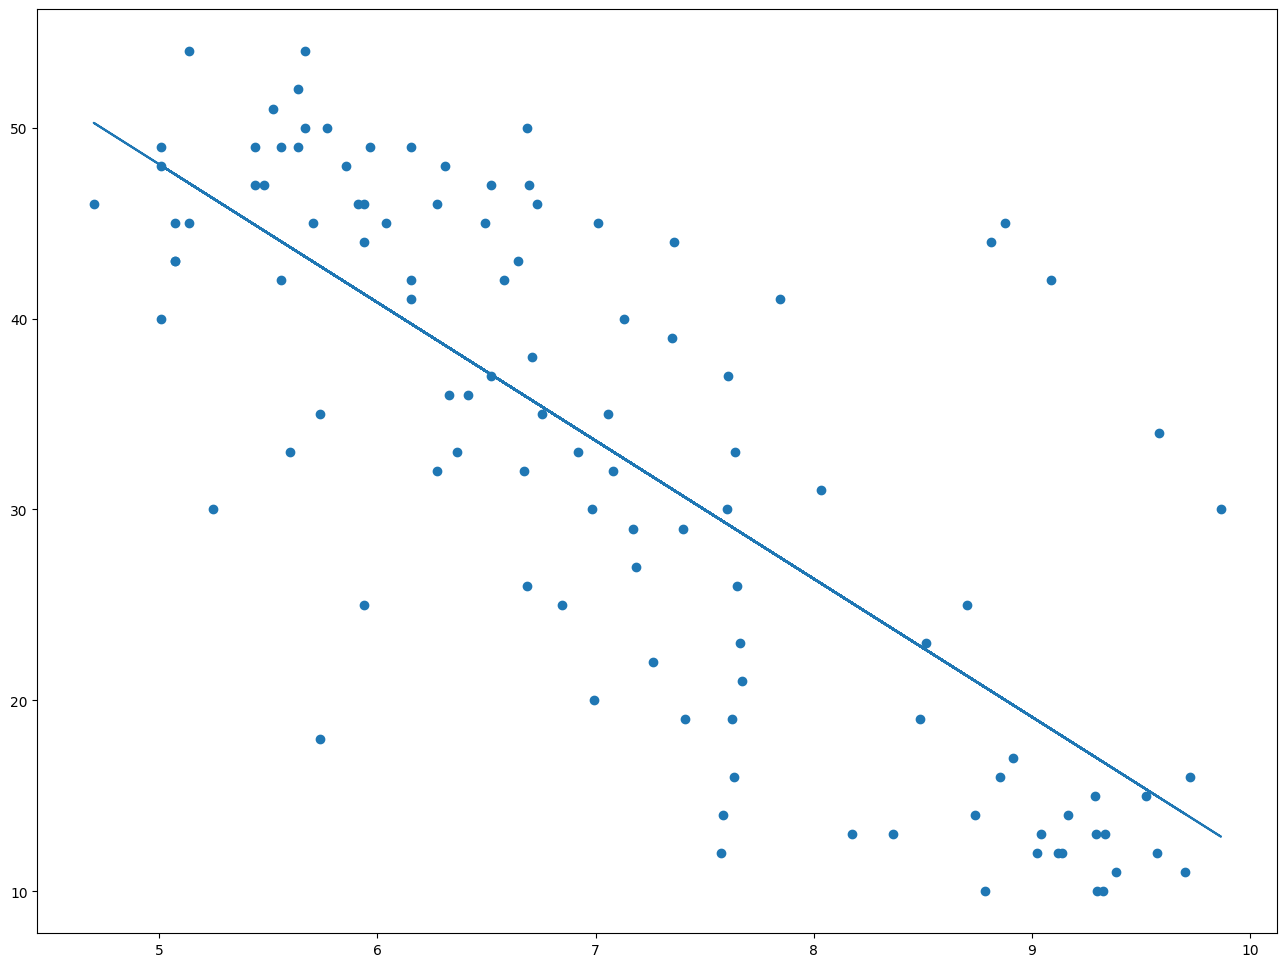

In [128]:
nations["log_gnpcap"] = nations.gnpcap.map(lambda x: math.log(x))
lm2 = smf.ols("birth ~ log_gnpcap", data = nations).fit()
print (lm2.summary())

plt.scatter(lm2.predict(), lm2.resid)
plt.show()

plt.scatter(nations.log_gnpcap, nations.birth)
plt.plot(nations.log_gnpcap, lm2.params[0] + lm2.params[1] * nations.log_gnpcap, '-')
plt.show()

**Model Specification**

In [135]:
mypath =  r'G:\My Drive\Dropbox\IIM-Aditya\Teaching\Executive courses\MSDSM -Business Analytics\codes\Regression\\'

elemapi = pd.read_csv(mypath + r'elemapi.csv')   

print(elemapi[['api00', 'acs_k3', 'meals',  'full']].head())


   api00 acs_k3  meals  full
0    693     16     67    76
1    570     15     92    79
2    546     17     97    68
3    571     20     90    87
4    478     18     89    87


,snum,dnum,api00,api99,growth,meals,ell,yr_rnd,mobility,acs_k3,...,grad_sch,avg_ed,full,emer,enroll,mealcat,collcat,abv_hsg,lgenroll,log_enroll
0,906,41,693,600,93,67,9,0,11,16,...,0,,76,24,247,2,1,100,2.392697,5.509388
1,889,41,570,501,69,92,21,0,33,15,...,0,,79,19,463,3,1,100,2.665581,6.137727
2,887,41,546,472,74,97,29,0,36,17,...,0,,68,29,395,3,1,100,2.596597,5.978886
3,876,41,571,487,84,90,27,0,27,20,...,0,1.9099999666214,87,11,418,3,1,64,2.621176,6.035481
4,888,41,478,425,53,89,30,0,44,18,...,0,1.5,87,13,520,3,1,50,2.716003,6.253829


In [142]:

elemapi2_0 = elemapi2[~pd.isna(elemapi2.acs_k3)]
lm = smf.ols("api00 ~ acs_k3", data = elemapi2_0).fit()
elemapi2_0.loc[:, "fv"] = lm.predict()
elemapi2_0.loc[:, "fvsquare"] = elemapi2_0.fv ** 2
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     2.934
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           0.000967
Time:                        08:45:43   Log-Likelihood:                -2534.1
No. Observations:                 400   AIC:                             5092.
Df Residuals:                     388   BIC:                             5140.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      479.0000     98.007      4.887   

In [140]:
lm = smf.ols("api00 ~ fv + fvsquare", data = elemapi2_0).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     16.51
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.30e-07
Time:                        08:44:20   Log-Likelihood:                -2534.1
No. Observations:                 400   AIC:                             5074.
Df Residuals:                     397   BIC:                             5086.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.319e-10   1227.506  -4.33e-13      1.0

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     44.83
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           7.34e-11
Time:                        08:46:25   Log-Likelihood:                -2528.8
No. Observations:                 400   AIC:                             5062.
Df Residuals:                     398   BIC:                             5070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    744.2514     15.933     46.711      0.0

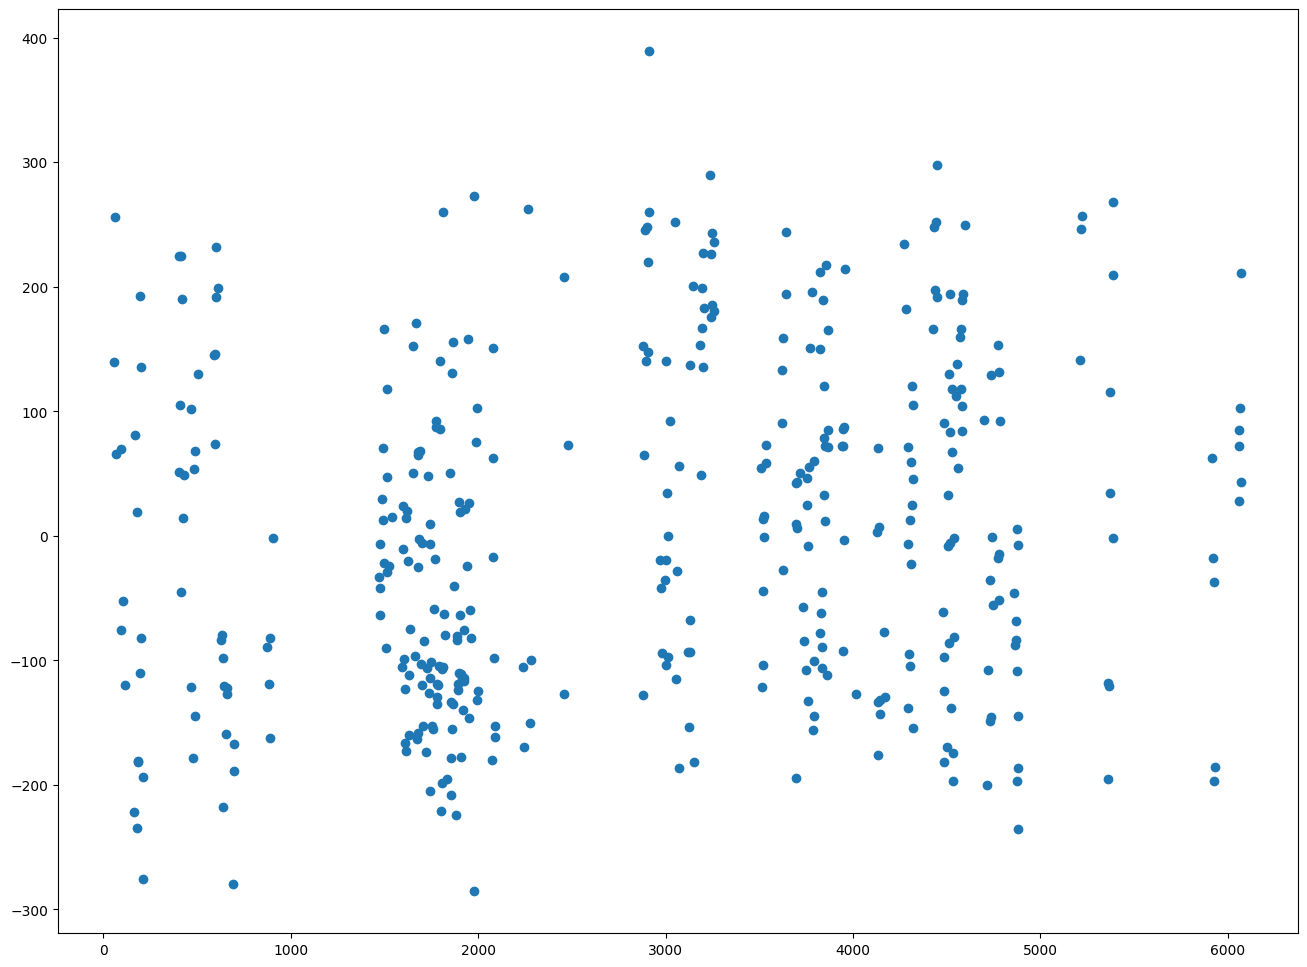

In [143]:
lm = smf.ols(formula = "api00 ~ enroll", data = elemapi2).fit()
print (lm.summary())
print( "Durbin-Watson test statistics is " + str(stools.durbin_watson(lm.resid))
)
plt.scatter(elemapi2.snum, lm.resid)
plt.show()

**Regression with forward variable selection**

In [174]:
df.head()

,snum,dnum,api00,api99,growth,meals,ell,yr_rnd,mobility,acs_k3,...,grad_sch,avg_ed,full,emer,enroll,mealcat,collcat,abv_hsg,lgenroll,log_enroll
0,906,41,693,600,93,67,9,0,11,16,...,0,,76,24,247,2,1,100,2.392697,5.509388
1,889,41,570,501,69,92,21,0,33,15,...,0,,79,19,463,3,1,100,2.665581,6.137727
2,887,41,546,472,74,97,29,0,36,17,...,0,,68,29,395,3,1,100,2.596597,5.978886
3,876,41,571,487,84,90,27,0,27,20,...,0,1.9099999666214,87,11,418,3,1,64,2.621176,6.035481
4,888,41,478,425,53,89,30,0,44,18,...,0,1.5,87,13,520,3,1,50,2.716003,6.253829


In [181]:
df.columns.tolist()[4:]

['growth',
 'meals',
 'ell',
 'yr_rnd',
 'mobility',
 'acs_k3',
 'acs_46',
 'not_hsg',
 'hsg',
 'some_col',
 'col_grad',
 'grad_sch',
 'avg_ed',
 'full',
 'emer',
 'enroll',
 'mealcat',
 'collcat',
 'abv_hsg',
 'lgenroll',
 'log_enroll']

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


df = elemapi2
indata = df
xvar = df.columns.tolist()[5:]
yvar = 'api00'
stopn = 15

'''
indata: is the data for analysis, in pd.DataFrame format
yvar: dependant variable name, it is string
xvar: list of independent variables name
stopn: number of variables to stop
'''


def importance_foreward(indata = df, yVar = yvar, xVar = xvar, stopn = stopn):

    scores = {}
    flist = []
    nx = min(len(xVar), stopn)

    while len(flist) < nx:
        best_score = -np.inf
        for i in xVar:
            newflist = flist + [i]
            f = 'api00 ~ ' + '+'.join(newflist)
            reg = smf.ols(formula = str(f), data = indata).fit()
            score = reg.fvalue
            if score > best_score:
                best_score, record_i, record_newflist = score, i, newflist
        flist = record_newflist
        print( flist)
        xVar.remove(record_i)
        print(len(xVar))

    return flist

In [178]:
yvar

'api00'

In [185]:
selected_features = importance_foreward(yVar=yvar)
print("Selected Features:", selected_features)

['meals']
19
['meals', 'emer']
18
['meals', 'emer', 'ell']
17
['meals', 'emer', 'ell', 'grad_sch']
16
['meals', 'emer', 'ell', 'grad_sch', 'not_hsg']
15
['meals', 'emer', 'ell', 'grad_sch', 'not_hsg', 'abv_hsg']
14
['meals', 'emer', 'ell', 'grad_sch', 'not_hsg', 'abv_hsg', 'mealcat']
13
['meals', 'emer', 'ell', 'grad_sch', 'not_hsg', 'abv_hsg', 'mealcat', 'yr_rnd']
12
['meals', 'emer', 'ell', 'grad_sch', 'not_hsg', 'abv_hsg', 'mealcat', 'yr_rnd', 'full']
11
['meals', 'emer', 'ell', 'grad_sch', 'not_hsg', 'abv_hsg', 'mealcat', 'yr_rnd', 'full', 'enroll']
10
['meals', 'emer', 'ell', 'grad_sch', 'not_hsg', 'abv_hsg', 'mealcat', 'yr_rnd', 'full', 'enroll', 'some_col']
9
['meals', 'emer', 'ell', 'grad_sch', 'not_hsg', 'abv_hsg', 'mealcat', 'yr_rnd', 'full', 'enroll', 'some_col', 'col_grad']
8
['meals', 'emer', 'ell', 'grad_sch', 'not_hsg', 'abv_hsg', 'mealcat', 'yr_rnd', 'full', 'enroll', 'some_col', 'col_grad', 'log_enroll']
7
['meals', 'emer', 'ell', 'grad_sch', 'not_hsg', 'abv_hsg', 'mea

In [196]:
import numpy as np
import pandas as pd
import urllib.request
from itertools import chain, combinations

import statsmodels.api as sm


mypath =  r'G:\My Drive\Dropbox\IIM-Aditya\Teaching\Executive courses\MSDSM -Business Analytics\codes\Regression\\'
# read in data from UCLA ATS
f =open(mypath + r'ericksen.txt').readlines()

# ignore the sas codes and clean data to pandas DataFrame
ericksen = pd.DataFrame([x.replace('\r\n', '').split() for x in f[19:85]])
ericksen.columns = 'area perc_min crimrate poverty diffeng hsgrad housing city countprc undcount'.split()

# convert to numeric values
for i in ericksen.columns[1:]:
    ericksen['num_'+i] = ericksen[i] .map(lambda x: float(x) + 0.0)



def best_subset(X, y):
    n_features = X.shape[1]
    subsets = chain.from_iterable(combinations(xrange(n_features), k+1) for k in xrange(n_features))
    best_score = -np.inf
    best_subset = None
    for subset in subsets:
        lin_reg = sm.OLS(y, X.iloc[:, subset]).fit()
        score = lin_reg.rsquared_adj
        if score > best_score:
            best_score, best_subset = score, subset
    return best_subset, best_score



print (ericksen.head(5))

X = ericksen.iloc[:, 10:18]
y = ericksen.iloc[:, 18]

           area perc_min crimrate poverty diffeng hsgrad housing city  \
0       Alabama     26.1       49    18.9     0.2   43.5     7.6    0   
1        Alaska      5.7       62    10.7     1.7   17.5    23.6    0   
2       Arizona     18.9       81    13.2     3.2   27.6     8.1    0   
3      Arkansas     16.9       38    19.0     0.2   44.5     7.0    0   
4  California_R     24.3       73    10.4     5.0   26.0    11.8    0   

  countprc undcount  num_perc_min  num_crimrate  num_poverty  num_diffeng  \
0        0    -0.04          26.1          49.0         18.9          0.2   
1      100     3.35           5.7          62.0         10.7          1.7   
2       18     2.48          18.9          81.0         13.2          3.2   
3        0    -0.74          16.9          38.0         19.0          0.2   
4        4     3.60          24.3          73.0         10.4          5.0   

   num_hsgrad  num_housing  num_city  num_countprc  num_undcount  
0        43.5          7.6     